In [32]:
import astropy.io.fits as fits
import interface
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Open up FITS file catalog 

In [63]:
hdulist = fits.open('test_galacticus_catalog.fits')

# Take a look at what's inside

In [34]:
hdulist.info()

Filename: btest_galacticus_catalog.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       6   ()              
1                BinTableHDU     40   17113R x 16C   [K, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D]   


In [35]:
for hdu in hdulist:
    print repr(hdu.header), '\n'

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
COMMENT Derived from Galacticus simulation version BLAH. Pasted Brown SEDs via n
COMMENT earest neighbor method                                                   

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  128 / length of dimension 1                          
NAXIS2  =                17113 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                 

# Get the file comment from the primary header

In [36]:
print hdulist[0].header['COMMENT']

Derived from Galacticus simulation version BLAH. Pasted Brown SEDs via n
earest neighbor method


# Get data set

In [37]:
catalog_data = hdulist[1].data

In [38]:
cols = hdulist[1].columns
cols.info()

name:
    ['galacID', 'redshift', 'ra', 'dec', 'LSSTu', 'LSSTg', 'LSSTr', 'LSSTi', 'LSSTz', 'LSSTy', 'errLSSTu', 'errLSSTg', 'errLSSTr', 'errLSSTi', 'errLSSTz', 'errLSSTy']
format:
    ['K', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D']
unit:
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
null:
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
bscale:
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
bzero:
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
disp:
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
start:
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
dim:
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']


# Place in pandas dataframe

In [39]:
column_names = cols.names

        
nrows = len(catalog_data)
ncols = len(catalog_data[0])
data_array = np.zeros((nrows, ncols))
        
for i, row in enumerate(catalog_data):
    for j in range(len(row)):
        data_array[i,j] = row[j]
                
catalog_df = pd.DataFrame(data_array, columns=column_names)

# close the file
hdulist.close()

In [40]:
catalog_df.head()

,galacID,redshift,ra,dec,LSSTu,LSSTg,LSSTr,LSSTi,LSSTz,LSSTy,errLSSTu,errLSSTg,errLSSTr,errLSSTi,errLSSTz,errLSSTy
0,0.0,1.408972,2.064467,-0.000193,24.524390,24.480272,24.250126,23.874793,23.570311,23.031719,0.186954,0.045559,0.033089,0.044981,0.066584,0.119024
1,1.0,1.833015,-1.145938,-1.835009,99.005150,99.005150,99.005150,99.005150,99.005150,99.005150,117.654299,116.329893,116.168972,116.895795,117.645059,118.847034
2,2.0,1.491844,1.803259,-2.111670,26.000209,25.633843,25.548468,25.360302,25.146015,24.143958,0.521025,0.141587,0.107373,0.163566,0.268849,0.489642
3,3.0,1.752645,1.784471,-0.833392,99.005150,30.049643,28.236967,26.812708,26.943322,28.330728,1.537066,0.618054,0.499738,0.779923,1.185317,2.066842
4,4.0,0.889468,-1.261424,-0.664721,25.923940,26.009924,25.516211,24.942974,24.632597,25.105566,0.556755,0.166062,0.110038,0.116197,0.171735,0.423610


# Or use PhotoZDC1 interface to do all the above

In [41]:
the_catalog = interface.ReadCosmoSim('test_galacticus_catalog.fits')
catalog_df = the_catalog._data
catalog_df.head()

,galacID,redshift,ra,dec,LSSTu,LSSTg,LSSTr,LSSTi,LSSTz,LSSTy,errLSSTu,errLSSTg,errLSSTr,errLSSTi,errLSSTz,errLSSTy
0,0.0,1.744404,-0.088252,-0.823255,28.421484,27.734265,28.172513,28.081149,27.767165,99.005150,2.848433,1.452423,1.178421,1.536830,1.935093,2.835953
1,1.0,0.949720,-0.081006,0.276563,25.819048,25.569932,25.315120,24.832021,24.582492,23.862780,0.407054,0.115515,0.085495,0.111592,0.170780,0.419927
2,2.0,1.049267,-0.735116,1.594992,32.448981,28.270779,26.522059,25.647528,24.404323,23.808400,3.592263,1.199900,0.252875,0.175306,0.151867,0.261844
3,3.0,1.115102,-2.071288,1.564616,27.612515,26.350018,25.859221,25.607467,24.914846,24.014559,1.210956,0.365380,0.194296,0.196544,0.183484,0.358795
4,4.0,1.638528,-1.592658,1.987461,26.370189,25.608780,25.573544,25.329801,24.995848,25.105753,0.504814,0.136611,0.098303,0.155192,0.260886,0.567483


# Plot the data

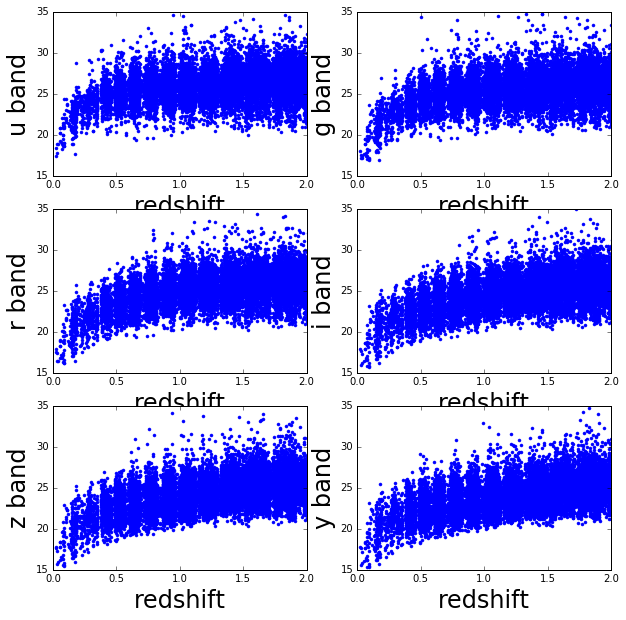

In [42]:
filts = ['u', 'g', 'r', 'i', 'z', 'y']

fig = plt.figure(figsize=(10,10))

for i,f in enumerate(filts):
    ax = fig.add_subplot(3,2,i+1)
    ax.plot(catalog_df['redshift'], catalog_df["LSST" + f], linestyle='none', marker='.')
    ax.set_xlabel('redshift', fontsize=24)
    ax.set_ylabel(f + ' band', fontsize=24)
    ax.set_xlim([0, 2.])
    ax.set_ylim([15, 35])


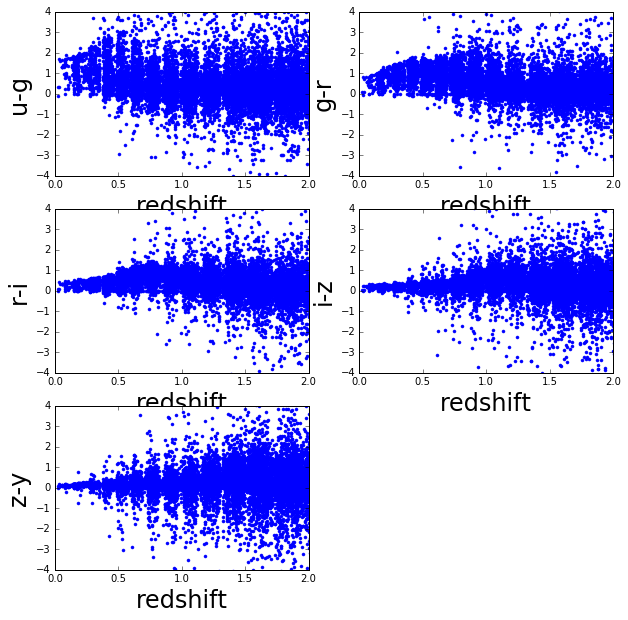

In [43]:
fig = plt.figure(figsize=(10,10))

for i in range(len(filts)-1):
    
    f1 = filts[i]
    f2 = filts[i+1]
    
    ax = fig.add_subplot(3,2,i+1)
    ax.plot(catalog_df['redshift'], catalog_df["LSST"+f1]-catalog_df["LSST"+f2], 
            linestyle='none', marker='.')
    ax.set_xlabel('redshift', fontsize=24)
    ax.set_ylabel(f1 + '-' + f2, fontsize=24)
    ax.set_xlim([0, 2.])
    ax.set_ylim([-4, 4])

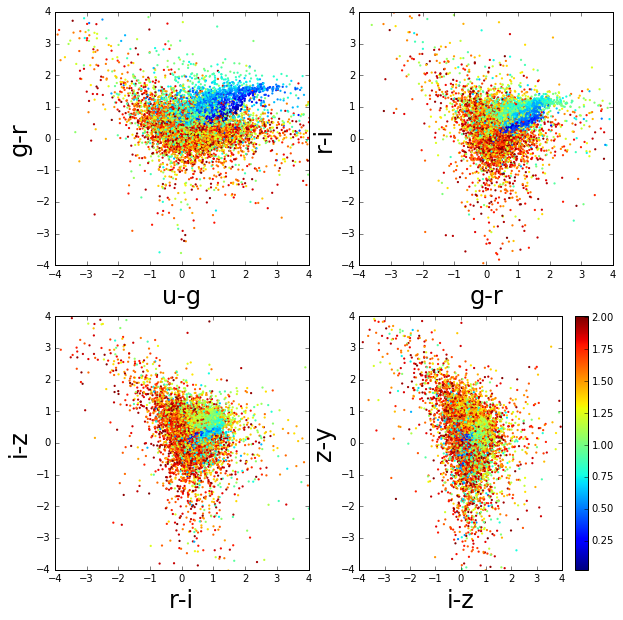

In [44]:
fig = plt.figure(figsize=(10,10))

for i in range(len(filts)-2):
    
    f1 = filts[i]
    f2 = filts[i+1]
    f3 = filts[i+2]
    
    ax = fig.add_subplot(2,2,i+1)
    sc = ax.scatter(catalog_df["LSST"+f1]-catalog_df["LSST"+f2], 
                    catalog_df["LSST"+f2]-catalog_df["LSST"+f3],
                    c=catalog_df['redshift'], s=5, edgecolors='none')
    ax.set_xlim([-4, 4])
    ax.set_ylim([-4, 4])
    ax.set_xlabel(f1+'-'+f2, fontsize=24)
    ax.set_ylabel(f2+'-'+f3, fontsize=24)
    
    if (i==len(filts)-3):
        plt.colorbar(sc)

# Do some preliminary photo-z analysis

In [45]:
from sklearn import cross_validation

# split into training and testing
phot_train, phot_test, redshift_train, redshift_test = cross_validation.train_test_split(
    catalog_df[["LSSTu", "LSSTg", "LSSTr", "LSSTi", "LSSTz", "LSSTy"]], 
    catalog_df.redshift, test_size=0.4, random_state=0)

In [46]:
type(phot_train)
print phot_train.shape, phot_test.shape
print redshift_train.shape, redshift_test.shape

(10267, 6) (6846, 6)
(10267,) (6846,)


In [47]:
from sklearn import ensemble

rf = ensemble.RandomForestRegressor(n_estimators=10, 
                                    criterion='mse', 
                                    max_depth=None, 
                                    min_samples_split=2, 
                                    min_samples_leaf=1, 
                                    min_weight_fraction_leaf=0.0, 
                                    max_features='auto', 
                                    max_leaf_nodes=None, 
                                    bootstrap=True, 
                                    oob_score=True, 
                                    n_jobs=1, 
                                    random_state=None, 
                                    verbose=0, 
                                    warm_start=False)

rf.fit(phot_train, redshift_train) #np.reshape(redshift_train)
redshift_predict = rf.predict(phot_test)




In [48]:
Rsq = rf.score(phot_test, redshift_test)
print "R^2", Rsq , "(R^2=-1,0,1 = anti/no/perfect relationship between model and test data)\n"

print "Importance of each band:\n", rf.feature_importances_

R^2 0.546073066354 (R^2=-1,0,1 = anti/no/perfect relationship between model and test data)

Importance of each band:
[ 0.10720204  0.1313364   0.11049045  0.14585465  0.39955936  0.1055571 ]


# Plot results

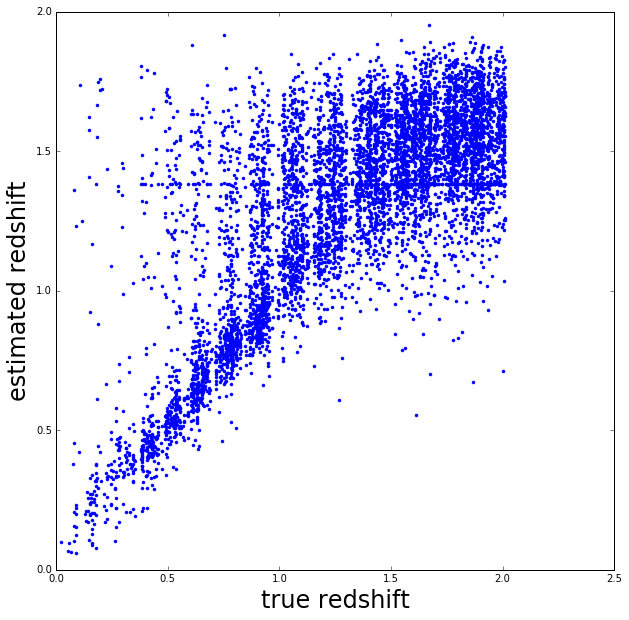

In [49]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.plot(redshift_test, redshift_predict, linestyle='none', marker='.')
ax.set_xlabel('true redshift', fontsize=24)
ax.set_ylabel('estimated redshift', fontsize=24)

In [50]:
ez = (redshift_test-redshift_predict)/(1.+redshift_test)
print ez.describe()

count    6846.000000
mean       -0.019073
std         0.161637
min        -1.475994
25%        -0.066804
50%         0.005018
75%         0.074713
max         0.429383
Name: redshift, dtype: float64


In [51]:
ez[phot_test["LSSTi"]<25.3].describe()

count    3702.000000
mean       -0.020001
std         0.158614
min        -1.475994
25%        -0.054576
50%        -0.002150
75%         0.051418
max         0.429383
Name: redshift, dtype: float64

In [52]:
ez[redshift_test<1.].describe()

count    1938.000000
mean       -0.131467
std         0.211062
min        -1.475994
25%        -0.194906
50%        -0.045160
75%        -0.001275
max         0.163971
Name: redshift, dtype: float64

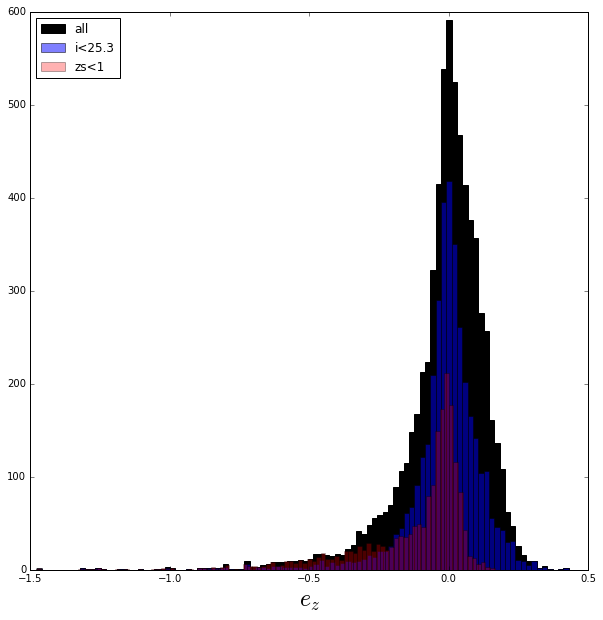

In [53]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
h1 = ax.hist(ez, 100, color='black', label='all')
h2 = ax.hist(ez[phot_test["LSSTi"]<25.3], 100, color='blue', alpha=0.5, label='i<25.3')
h3 = ax.hist(ez[redshift_test<1.], 100, color='red', alpha=0.3, label='zs<1')
handles, labels = ax.get_legend_handles_labels()
ax.legend(labels, loc='upper left')
ax.set_xlabel('$e_z$', fontsize=24)

# Join together test input, output and predictions

In [54]:
redshift_predict = pd.DataFrame(data=redshift_predict, 
             index=redshift_test.index.values,
             columns=['redshift_predicted'])


result_set = phot_test.join(redshift_test).join(redshift_predict)
result_set.head()


,LSSTu,LSSTg,LSSTr,LSSTi,LSSTz,LSSTy,redshift,redshift_predicted
15983,26.517315,26.368887,26.169407,26.065210,25.421474,24.998473,1.868050,1.588146
8987,99.005150,28.877550,27.533502,27.130111,27.726313,27.784825,1.581310,1.612326
16771,24.623124,24.471091,23.589498,22.694920,21.952541,21.561161,1.095514,1.042814
7501,22.525256,22.304756,22.245359,22.178080,22.136689,21.982042,1.521967,1.620195
548,26.122867,23.767013,22.216309,21.076023,20.646538,20.370121,0.628109,0.573792


# Use PhotoZDC1 photo-z validation code

In [55]:
import photo_z as pz

### Global estimates
print "Raw global stats:"
g = pz.global_stats(result_set["redshift_predicted"],  result_set["redshift"])

print "Gold global stats:"
iGold = (result_set["LSSTi"]<=25.3) & (result_set["LSSTi"]>0)
gg = pz.global_stats(result_set["redshift_predicted"],  result_set["redshift"], iGold)


Raw global stats:
global sigma: 0.162 global bias: -0.005
global IQR: 0.142 global IQR-sigma: 0.105
total number = 6846 

Gold global stats:
global sigma: 0.159 global bias: 0.002
global IQR: 0.106 global IQR-sigma: 0.079
number selected = 3702 



In [56]:
pz.add_ez_column(result_set, "redshift", photo_z="redshift_predicted", col_name="ez")
result_set.head()

,LSSTu,LSSTg,LSSTr,LSSTi,LSSTz,LSSTy,redshift,redshift_predicted,ez
15983,26.517315,26.368887,26.169407,26.065210,25.421474,24.998473,1.868050,1.588146,-0.097594
8987,99.005150,28.877550,27.533502,27.130111,27.726313,27.784825,1.581310,1.612326,0.012016
16771,24.623124,24.471091,23.589498,22.694920,21.952541,21.561161,1.095514,1.042814,-0.025149
7501,22.525256,22.304756,22.245359,22.178080,22.136689,21.982042,1.521967,1.620195,0.038949
548,26.122867,23.767013,22.216309,21.076023,20.646538,20.370121,0.628109,0.573792,-0.033362


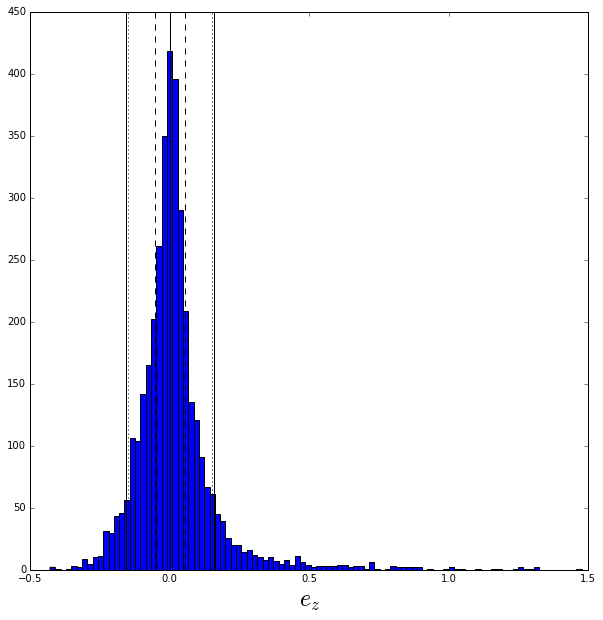

In [57]:
### Plot histogram
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
pz.histogram_ez(result_set["ez"], ax, selection=iGold, plot_stats=True, bins=100)
ax.set_xlabel('$e_z$', fontsize=24)

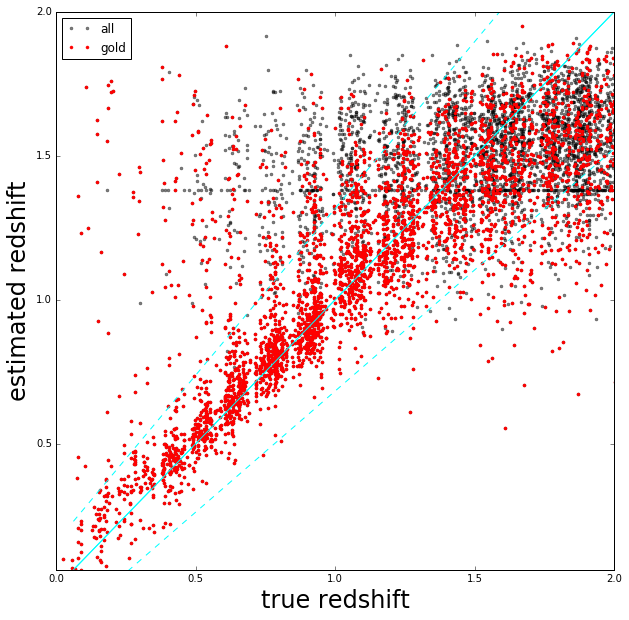

In [58]:
### Plot scatter plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
pz.photoz_vs_z(result_set['redshift_predicted'], result_set['redshift'],
               ax, plot_sigs=False, guide_color='cyan', 
               color='black', alpha=0.5, label='all',
               marker='.', linestyle='none')
pz.photoz_vs_z(result_set['redshift_predicted'], result_set['redshift'],
               ax, selection=iGold, plot_sigs=True, guide_color='cyan', 
               color='red', label='gold',
               marker='.', linestyle='none')
ax.set_xlim([0,2])
ax.set_xlabel('true redshift', fontsize=24)
ax.set_ylabel('estimated redshift', fontsize=24)
handles, labels = ax.get_legend_handles_labels()
ax.legend(prop={'size':12}, loc='upper left')

(0.0, 2.0) 0.02
(0.0, 2.0) 0.003
(0.0, 2.0) 0.1


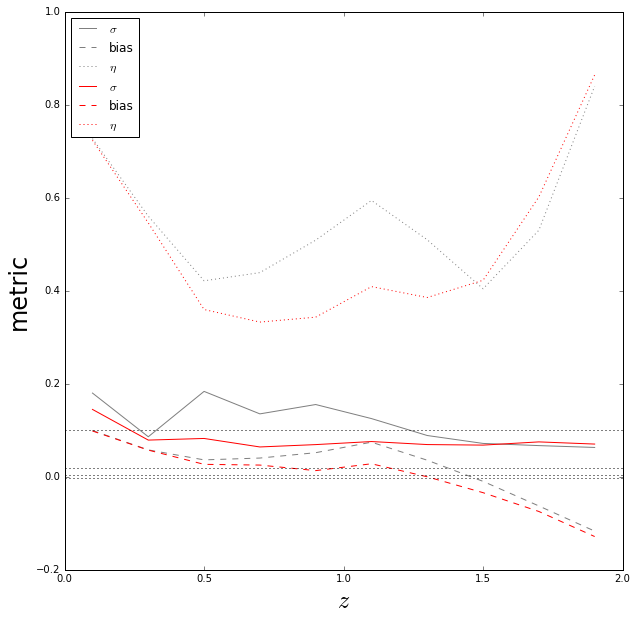

In [59]:
### Plot stats vs z on one plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
pz.all_stats_vs_redshift(result_set, "redshift_predicted", "redshift", ax, 
                         color='black', alpha=0.5)
pz.all_stats_vs_redshift(result_set, "redshift_predicted", "redshift", ax, iGold, color='red')
ax.set_xlabel('$z$', fontsize=24)
ax.set_ylabel('metric', fontsize=24)
handles, labels = ax.get_legend_handles_labels()
ax.legend(prop={'size':12}, loc='upper left')
pz.add_LSST_req(ax, req_type='SIGMA', linestyle='dotted', color='black')
pz.add_LSST_req(ax, req_type='BIAS', linestyle='dotted', color='black')
pz.add_LSST_req(ax, req_type='OUTLIER', linestyle='dotted', color='black')

SIGMA
(0.0, 2.0) 0.02
BIAS
(0.0, 2.0) 0.003
OUTLIER
(0.0, 2.0) 0.1
CATASTROPHIC
(0.0, 2.0) 0.1


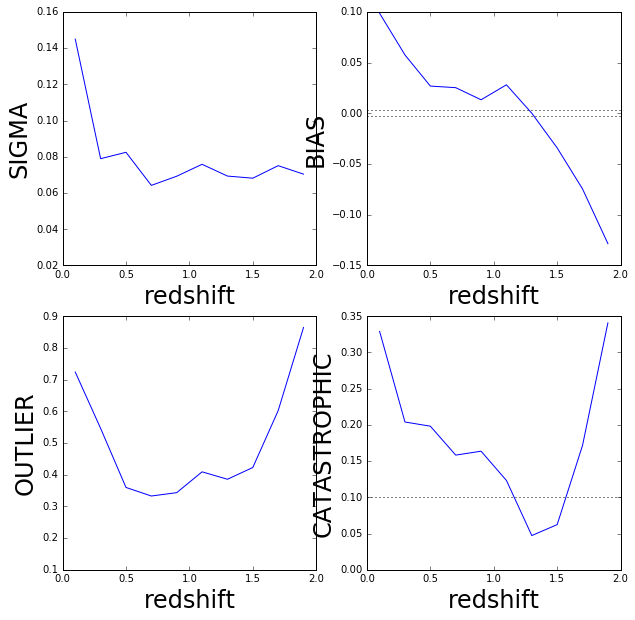

In [60]:
stats = ['SIGMA', 'BIAS', 'OUTLIER', 'CATASTROPHIC']

### Plot stats separately
fig = plt.figure(figsize=(10,10))

for i,s in enumerate(stats):
    ax = fig.add_subplot(2,2,i+1)

    pz.one_stat_vs_redshift(result_set, "redshift_predicted", "redshift",  
                            ax, stat=s, selection=iGold, zbins=[0,2,0.2])
    ax.set_xlabel('redshift', fontsize=24)
    ax.set_ylabel(s, fontsize=24)
    #if i<3:
    print s
    pz.add_LSST_req(ax, req_type=s, linestyle='dotted', color='black')


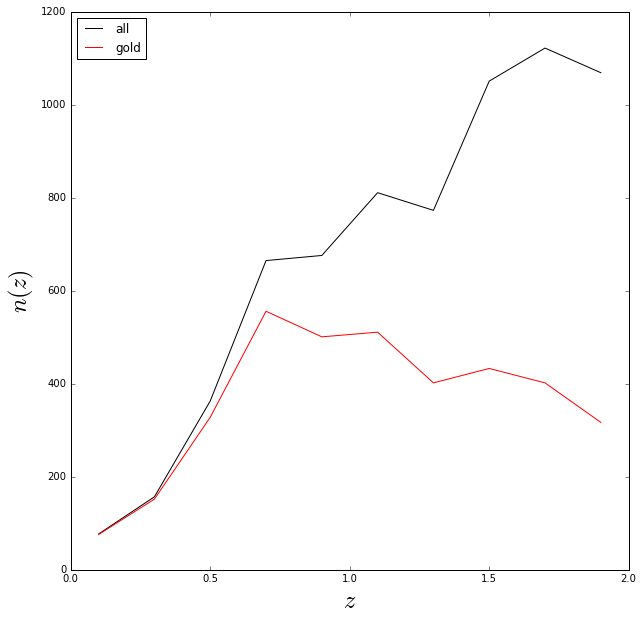

In [61]:
### Plot n(z)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
pz.n_of_z(result_set, "ez", "redshift", ax, color='black', label='all')
pz.n_of_z(result_set, "ez", "redshift", ax, iGold, color='red', label='gold')
ax.set_xlabel('$z$', fontsize=24)
ax.set_ylabel('$n(z)$', fontsize=24)
handles, labels = ax.get_legend_handles_labels()
ax.legend(prop={'size':12}, loc='upper left')


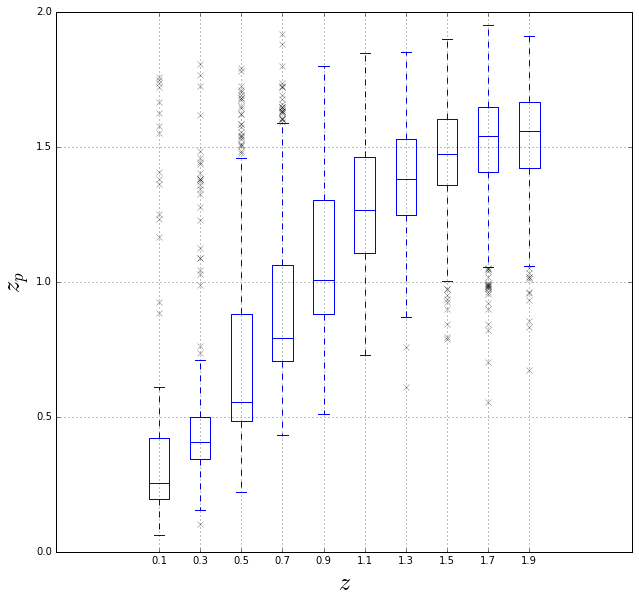

In [62]:
### Plot distribution
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
pz.distribution_vs_redshift(result_set, "redshift_predicted", "redshift", ax)
ax.set_xlabel('$z$', fontsize=24)
ax.set_ylabel('$z_p$', fontsize=24)